In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Walt_disney_movie_dataset.csv')


In [3]:
production_comp = df["Production company"]
country = df["Country"]
language = df["Language"]
running_time = df["Running time (int)"]
box_office = df["Box office (float)"]
budget = df["Budget (float)"]
release_date = df["Release date (datetime)"]
director = df["Directed by"]
writer = df["Written by"]
composer = df["Music by"]

def nominal2numeric(nominal):
    numeric_value =1
    nominal_uq_map = {}
    numeric_ret_list =[]
    for i in nominal:
        if i in nominal_uq_map:
            numeric_ret_list.append(nominal_uq_map[i])
        else:
            nominal_uq_map[i] = numeric_value
            numeric_value += 1
            numeric_ret_list.append(nominal_uq_map[i])
    return pd.DataFrame(numeric_ret_list)


In [4]:

production_comp = nominal2numeric(production_comp)
country = nominal2numeric(country)
language = nominal2numeric(language)
director = nominal2numeric(director)
writer = nominal2numeric(writer)
composer = nominal2numeric(composer)


In [5]:
production_comp.columns = ['Production Company']
country.columns = ['Country']
language.columns = ['Language']
director.columns = ['Director']
writer.columns = ['Writer']
composer.columns = ['Composer']


In [6]:

data = pd.concat([running_time, box_office, budget,
                production_comp, country, language,
                director, writer, composer],axis=1)
data

,Running time (int),Box office (float),Budget (float),Production Company,Country,Language,Director,Writer,Composer
0,41.0,4.547200e+01,NaN,1,1,1,1,1,1
1,83.0,4.180000e+08,1490000.0,1,1,1,2,2,2
2,88.0,1.640000e+08,2600000.0,1,1,1,3,1,3
3,126.0,8.330000e+07,2280000.0,1,1,1,4,1,4
4,74.0,9.600000e+05,600000.0,1,1,1,5,3,5
...,...,...,...,...,...,...,...,...,...
447,NaN,NaN,NaN,2,1,1,294,1,147
448,96.0,4.490000e+07,28000000.0,4,1,1,96,1,97
449,NaN,NaN,NaN,2,1,1,88,1,1
450,NaN,NaN,NaN,2,1,1,212,1,84


In [7]:
corr = data.corr()

# corr = np.corrcoef(data, rowvar=False)
corr


,Running time (int),Box office (float),Budget (float),Production Company,Country,Language,Director,Writer,Composer
Running time (int),1.000000,0.275542,0.391025,0.109760,0.188192,0.173988,0.269417,0.130071,0.261223
Box office (float),0.275542,1.000000,0.729329,0.120252,-0.071318,-0.080137,0.411565,-0.063800,0.299788
Budget (float),0.391025,0.729329,1.000000,0.128236,-0.127245,-0.113592,0.501026,-0.029322,0.321454
Production Company,0.109760,0.120252,0.128236,1.000000,0.187828,0.152762,0.515042,0.214683,0.548701
Country,0.188192,-0.071318,-0.127245,0.187828,1.000000,0.899771,0.241380,0.273744,0.293571
Language,0.173988,-0.080137,-0.113592,0.152762,0.899771,1.000000,0.248161,0.291963,0.299242
Director,0.269417,0.411565,0.501026,0.515042,0.241380,0.248161,1.000000,0.292053,0.852770
Writer,0.130071,-0.063800,-0.029322,0.214683,0.273744,0.291963,0.292053,1.000000,0.291730
Composer,0.261223,0.299788,0.321454,0.548701,0.293571,0.299242,0.852770,0.291730,1.000000


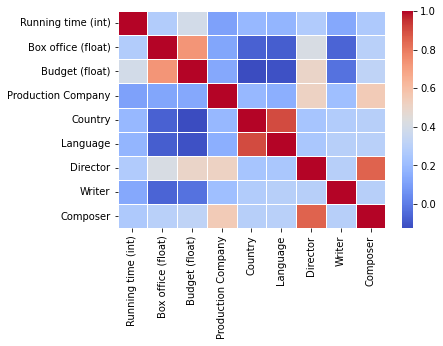

In [17]:
ax = sns.heatmap(corr, linewidths=0.5, cmap='coolwarm')
